In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2}'.format

data = pd.read_excel('factor_pricing_data.xlsx', sheet_name=None, index_col=0)

print(data.keys())

descripts = data['descriptions']
factors = data['factors (excess returns)']
portfolios = data['portfolios (excess returns)']
rf_rate = data['risk-free rate']

display(descripts)
display(factors)
display(portfolios)
display(rf_rate)



dict_keys(['descriptions', 'factors (excess returns)', 'portfolios (excess returns)', 'risk-free rate'])


,Name,Unit,Construction,Description
MKT,Market,Excess Return,Market-cap-weighted,US Equities
SMB,Size,Excess Return,Small Minus Big,Long small stocks and short big stocks
HML,Value,Excess Return,High Minus Low,Long value (high book-to-market) stocks and sh...
RMW,Profitability,Excess Return,Robust Minus Weak,Long profitability (income statement) and shor...
CMA,Investment,Excess Return,Conservative Minus Agressive,Long stocks with low (conservative) investment...
UMD,Momentum,Excess Return,Up Minus Down,Long stocks that have high recent returns and ...
RF,Risk-free rate,Total Return,Tbills,NaN


,MKT,SMB,HML,RMW,CMA,UMD
Date,,,,,,
1980-01-31,0.055,0.018,0.018,-0.017,0.016,0.075
1980-02-29,-0.012,-0.016,0.0061,0.0004,0.027,0.079
1980-03-31,-0.13,-0.069,-0.01,0.015,-0.012,-0.096
1980-04-30,0.04,0.011,0.011,-0.021,0.0029,-0.0043
1980-05-31,0.053,0.021,0.0038,0.0034,-0.0031,-0.011
...,...,...,...,...,...,...
2023-12-31,0.049,0.073,0.049,-0.031,0.013,-0.055
2024-01-31,0.007,-0.057,-0.024,0.0069,-0.0096,0.051
2024-02-29,0.051,-0.0078,-0.035,-0.02,-0.021,0.05


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-31,-0.0076,0.029,0.0084,0.1,-0.014,0.1,0.036,0.032,0.0048,0.0059,...,0.016,0.087,0.046,-0.013,0.043,-0.028,0.026,0.077,0.031,0.067
1980-02-29,0.011,-0.061,-0.097,-0.032,-0.057,-0.032,-0.052,-0.08,-0.056,-0.017,...,-0.0079,-0.054,-0.035,-0.064,-0.065,-0.085,-0.096,-0.035,-0.028,-0.027
1980-03-31,-0.22,-0.11,-0.017,-0.15,-0.019,-0.13,-0.083,-0.12,-0.057,-0.067,...,-0.082,-0.15,-0.11,-0.091,-0.14,-0.056,-0.088,-0.25,-0.13,-0.17
1980-04-30,0.045,0.077,0.023,0.032,0.083,-0.053,0.078,0.015,0.03,0.011,...,0.042,-0.01,-0.031,0.035,0.054,0.073,0.053,0.098,0.045,0.077
1980-05-31,0.063,0.079,0.046,0.086,0.082,0.051,0.032,0.089,0.056,0.0098,...,0.056,0.11,0.11,0.088,0.11,0.058,0.056,0.092,0.084,0.069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,0.063,0.039,0.018,0.0012,0.0048,0.097,0.035,0.084,-0.0011,0.042,...,0.031,0.069,0.042,0.059,0.046,0.092,-0.01,0.17,0.097,0.01
2024-01-31,-0.05,-0.02,-0.012,-0.013,-0.03,-0.061,0.074,-0.0088,0.033,-0.056,...,-0.017,-0.02,0.025,0.0092,0.0015,0.011,0.013,-0.055,-0.026,0.041
2024-02-29,0.16,-0.013,0.039,-0.0032,-0.0042,0.033,0.06,0.011,0.026,0.056,...,0.052,0.081,0.053,0.1,0.05,0.036,0.016,0.043,0.044,0.067


,RF
Date,
1980-01-31,0.008
1980-02-29,0.0089
1980-03-31,0.012
1980-04-30,0.013
1980-05-31,0.0081
...,...
2023-12-31,0.0043
2024-01-31,0.0047
2024-02-29,0.0042


In [3]:
def summary_stats(rets, adj_factor=12):
    """
    Given a dataframe of returns, this function returns a dataframe with
    a summary of performance statistics for individual securities.
    """
    stats = {}
    
    stats['Annualized Mean'] = rets.mean() * adj_factor
    stats['Annualized Volatility'] = rets.std() * np.sqrt(adj_factor)
    stats['Annualized Sharpe Ratio'] = (stats['Annualized Mean'] / stats['Annualized Volatility'])
    stats['VaR'] = rets.quantile(0.05, axis=0)
    
    return pd.DataFrame(stats, index=rets.columns)

stats = summary_stats(factors).sort_values("VaR", ascending=False)

display(stats)

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio,VaR
CMA,0.031,0.073,0.42,-0.027
RMW,0.046,0.083,0.55,-0.03
HML,0.026,0.11,0.24,-0.042
SMB,0.0082,0.1,0.081,-0.043
UMD,0.063,0.15,0.4,-0.068
MKT,0.085,0.16,0.54,-0.074


In [6]:
def plot_correlation_matrix(corrs):
    # Correlation helper function.
    return sns.heatmap(
        corrs,
        annot=True,
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        linewidths=0.7,
        annot_kws={"size": 10},
        fmt=".2f",
        square=True,
        cbar_kws={"shrink": 0.75},
    )

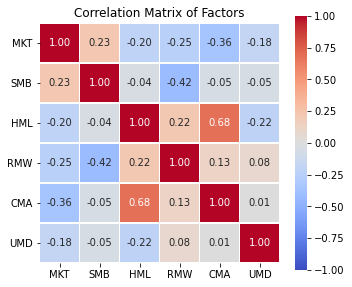

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
ax = plot_correlation_matrix(factors.corr())

ax.set_title("Correlation Matrix of Factors")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment="right")
fig.tight_layout()

InvalidIndexError: (slice(None, None, None), None)

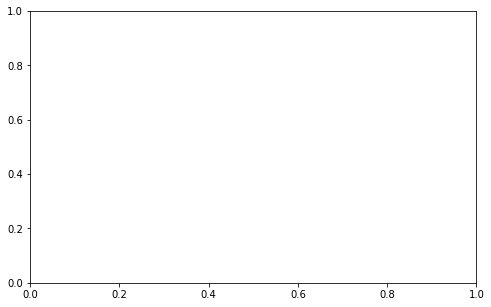

In [8]:
factors_cum = (1 + factors).cumprod() - 1

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(factors_cum.index, factors_cum, lw=2)

# Add a legend.
ax.legend(factors_cum.columns, loc="upper left")

# Make xticks every year and format them as years.
ax.set_xticks(factors_cum.index[::24])
ax.set_xticklabels(factors_cum.index[::24].year, rotation=45)
ax.set_yticks(np.arange(-1, 13, 1))
ax.set_yticklabels(["{:d}".format(x * 100) for x in ax.get_yticks()])
ax.set_xlabel("Year")
ax.set_ylabel("Cumulative Return (%)")
ax.set_title("Cumulative Returns of Factors")
fig.tight_layout()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Annualized Return,0.088,0.096,0.11,0.11,0.13,0.059,0.12,0.074,0.08,0.095,...,0.093,0.088,0.086,0.11,0.1,0.091,0.096,0.045,0.11,0.053
Annualized Volatility,0.22,0.15,0.22,0.17,0.22,0.25,0.26,0.21,0.15,0.22,...,0.2,0.2,0.18,0.19,0.18,0.22,0.18,0.25,0.22,0.21
Annualized Sharpe Ratio,0.4,0.64,0.48,0.68,0.58,0.24,0.44,0.36,0.52,0.42,...,0.47,0.44,0.48,0.6,0.56,0.42,0.53,0.18,0.5,0.25
VaR (0.05),-0.089,-0.059,-0.095,-0.068,-0.092,-0.11,-0.11,-0.085,-0.069,-0.1,...,-0.088,-0.088,-0.077,-0.08,-0.075,-0.095,-0.077,-0.1,-0.1,-0.097


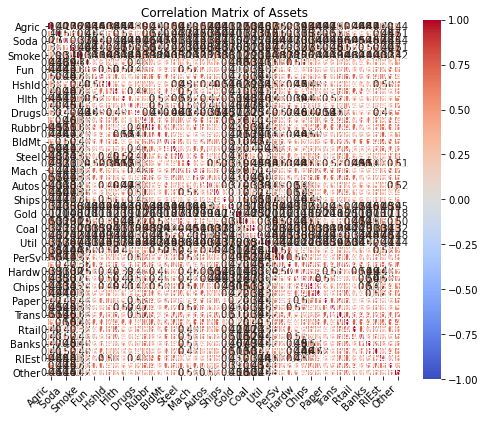

In [11]:
UNIV_NAMES = [
    "Annualized Return",
    "Annualized Volatility",
    "Annualized Sharpe Ratio",
    "VaR (0.05)",
]
ADJ = 12
UNIV_FUNCS = [
    lambda x: x.mean() * ADJ,
    lambda x: x.std() * np.sqrt(ADJ),
    lambda x: (x.mean() / x.std()) * np.sqrt(ADJ),
    lambda x: x.quantile(0.05),
]
assets_summary = portfolios.aggregate(UNIV_FUNCS)
assets_summary.index = UNIV_NAMES

display(assets_summary)

fig, ax = plt.subplots(figsize=(7, 7))
ax = plot_correlation_matrix(portfolios.corr())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
ax.set_title("Correlation Matrix of Assets")
fig.tight_layout()